# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


In [103]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [104]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('drive/MyDrive/Assignment/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [105]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

### Task one
# Basic Data Exploration

>Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [106]:
num_row, num_col = df.shape

(num_row, num_col)

(148654, 13)

In [107]:
pd.DataFrame({
    'Data Type': df.dtypes,
    'Have Missing Values': df.isnull().any(),
}, index=df.columns)

,Data Type,Have Missing Values
Id,int64,False
EmployeeName,object,False
JobTitle,object,False
BasePay,float64,True
OvertimePay,float64,True
OtherPay,float64,True
Benefits,float64,True
TotalPay,float64,False
TotalPayBenefits,float64,False
Year,int64,False


Notice that all `EmployeeName`, `JobTitle`, and `Agency` are strings, so we'll correct their types:

In [108]:
df = df.astype({
    'EmployeeName': 'string',
    'JobTitle': 'string',
    'Agency': 'string',
})

df.dtypes.to_frame('Data Type')

,Data Type
Id,int64
EmployeeName,string
JobTitle,string
BasePay,float64
OvertimePay,float64
OtherPay,float64
Benefits,float64
TotalPay,float64
TotalPayBenefits,float64
Year,int64


### Task two
# Descriptive Statistics

>Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [109]:
salaries = df['TotalPay']  # We assumed that Salary is TotalPay

pd.DataFrame({
    'Mean': salaries.mean(),
    'Median': salaries.median(),
    'Modes': salaries.mode().values,
    'Minimum': salaries.min(),
    'Maximum': salaries.max(),
    'Range': salaries.max() - salaries.min(),
    'Standard Deviation': salaries.std(),
}, index=['Salary Statistics']).T

,Salary Statistics
Mean,74768.321972
Median,71426.610000
Modes,0.000000
Minimum,-618.130000
Maximum,567595.430000
Range,568213.560000
Standard Deviation,50517.005274


### Task three
# Data Cleaning

>Handle missing data by suitable method with explain why you use it.

### Clean `Benefits`
We have some facts here:
- `TotalPayBenefits` has no missing values;
- `TotalPay` has no missing values;
- `TotalPayBenefits` = `TotalPay` + `Benefits`.

So we can calculate the missing values of `Benefits` like that:

In [110]:
df['Benefits'].fillna(df['TotalPayBenefits'] - df['TotalPay'], inplace=True)

### Clean `BasePay`, `OvertimePay`, and `OtherPay`

We have some facts here:
- `TotalPay` has no missing values;
- `TotalPay = BasePay + OvertimePay + OtherPay`.
- There is no row miss `OvertimePay` or `OtherPay` without missing `BasePay`

You can check the last fact by run the following line and get `0`:


In [111]:
df[(df['BasePay'].isna() == False) & (df['OvertimePay'].isna() | df['OtherPay'].isna())].size

0

So we can assume that missing values for both `OvertimePay` and `OtherPay` are `0.0`, and calculate the missing values of `BasePay` like that:

In [112]:
df['OvertimePay'].fillna(0.0, inplace=True)
df['OtherPay'].fillna(0.0, inplace=True)
df['BasePay'].fillna(df['TotalPay'] - df['OvertimePay'] - df['OtherPay'], inplace=True)

### Clean `Notes` and `Status`

We know that all `Notes`, and `Status` values are missing, we can check that by run the following lines and get `0`'s:

In [113]:
df['Notes'].count()

0

In [114]:
df['Status'].count()

0

So, the most make-sence action to do here is to remove the whole two columns:

In [115]:
df.drop(['Notes', 'Status'], axis=1, inplace=True)

### Browse the Data Again

Now, our data are clean:

In [116]:
df.isnull().any().to_frame('Have Missing Values')

,Have Missing Values
Id,False
EmployeeName,False
JobTitle,False
BasePay,False
OvertimePay,False
OtherPay,False
Benefits,False
TotalPay,False
TotalPayBenefits,False
Year,False


### Task four
# Basic Data Visualization

> Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

First of all, we'll make the plot style with dark mode:

In [117]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## Visualize Salaries

<Axes: >

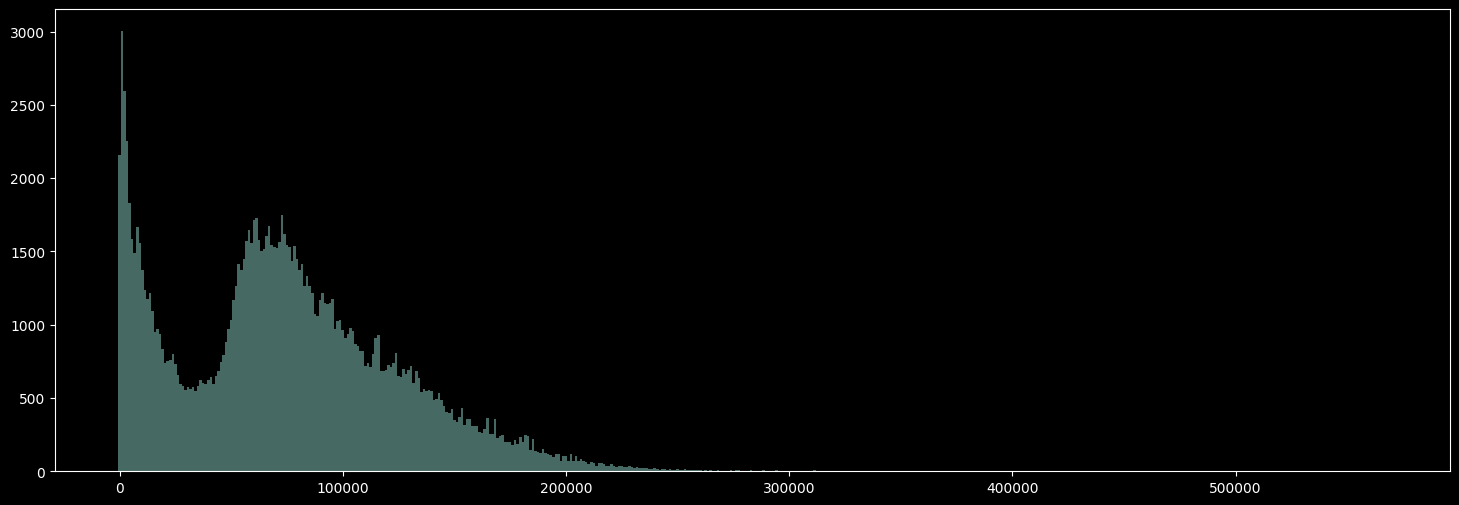

In [118]:
salaries.hist(
    bins=500,
    grid=False,
    figsize=(18, 6),
    alpha=0.5,
)

## Visualize Departments

First of all, we need to extract `Department` column from `JobTitle` column, for example, the department of an employee with job title *"CAPTAIN III (POLICE DEPARTMENT)"* is *"police department"*, while the department of an employee with job title *"GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY"* is *"none"*.

To do so, we need some RegEx stuff, like that:

In [119]:
import re

def extract_department(row):
    string = row['JobTitle']
    matches = re.findall(r'\(([^\(\)]+)\)[ \t]*$',string)
    if len(matches) == 0:
        return 'none'
    dep = matches[-1]
    dep = dep.lower().replace('dept', 'department').replace('cvl', 'civil').replace('crmnl', 'criminal')
    dep = re.sub(r'( ?[&/] ?)', ' ', dep)
    return dep

df['Department'] = departments = df.apply(extract_department, axis=1).astype('string')

Now we can see the departments for the employees:

In [120]:
departments.value_counts().to_frame('Count')

,Count
none,146060
civil criminal,1534
police department,712
seasonal,116
mfcc,90
fire department,78
sfers,64


Notice that most of the employees has no department (i.e. thier department is 'none').

So we will first plot a simple pie to show how much employees have a department:

<Axes: ylabel='Count'>

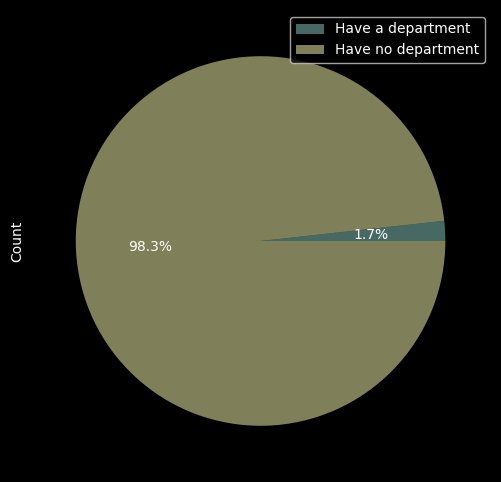

In [121]:
pd.DataFrame({
    'Have a department': sum(departments != 'none'),
    'Have no department': sum(departments == 'none'),
}, index=['Count']).T.plot.pie(
    y='Count',
    autopct='%1.1f%%',
    figsize=(6, 6),
    labels=None,
    wedgeprops={'alpha': 0.5},
)

Now we'll plot a pie to show the departments for employees who have a department (i.e. thier department is not 'none')

<Axes: ylabel='Count'>

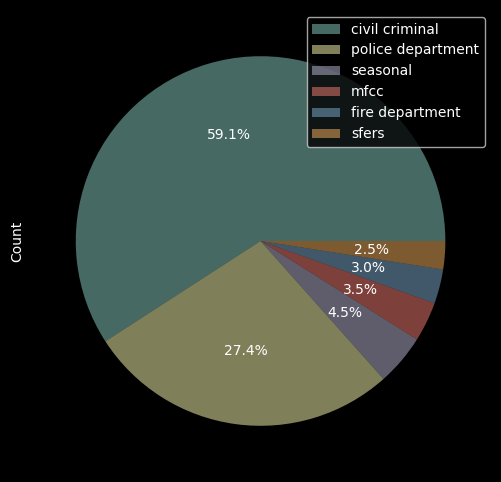

In [122]:
departments.value_counts().drop('none').to_frame('Count').plot.pie(
    y='Count',
    autopct='%1.1f%%',
    figsize=(6, 6),
    labels=None,
    wedgeprops={'alpha': 0.5},
)

### Task five
# Grouped Analysis

> Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

We will group the data by `Department` column, then by `Year` column:

In [123]:
df.groupby(['Department', 'Year'])['TotalPay'].describe().drop('none')

count           mean           std        min  \
Department        Year                                                  
civil criminal    2011  385.0  129165.480000  43335.943219     602.20   
                  2012  377.0  134923.415119  44348.777652     541.83   
                  2013  378.0  144274.871508  48817.272604       0.00   
                  2014  394.0  138909.879518  51566.749075      13.35   
fire department   2011   52.0  221158.444615  55969.573003    7093.37   
                  2012    9.0  255201.191111  59675.155455  107699.79   
                  2013    9.0  265593.600000  89973.080839   35332.78   
                  2014    8.0  281220.665000  28299.189119  235275.60   
mfcc              2011   90.0   67517.330222  23341.204323    1122.70   
police department 2011  667.0  158810.073568  31092.000146     283.86   
                  2012   18.0  146796.504444  43845.790738     438.22   
                  2013   16.0  154656.967500  43200.950542    7857.26   
                  2014   11.0  159498.771818  21197.082813  120050.22   
seasonal          2011   30.0    7488.975667   3272.941172    1380.00   
                  2012   29.0    8919.360000   3578.244758     293.40   
                  2013   30.0   10946.450000   4237.267264    4500.80   
                  2014   27.0   10246.758519   3689.333398    4157.40   
sfers             2012    9.0   78510.276667  59582.111284    3346.00   
                  2013   15.0   86609.832000  62233.259273     576.36   
                  2014   40.0   90172.248500  40442.417044   11116.41   

                                25%         50%          75%        max  
Department        Year                                                   
civil criminal    2011  103978.3300  140691.970  164352.6500  214988.68  
                  2012  105204.9100  150831.480  168419.8200  221910.50  
                  2013  113352.2900  160002.275  181301.0575  225366.50  
                  2014  111576.7250  156347.900  181447.2475  221676.97  
fire department   2011  193868.1775  226838.115  250455.2150  326373.19  
                  2012  257378.9500  268486.400  284102.4500  315728.77  
                  2013  276335.8300  290992.510  298710.3100  333888.32  
                  2014  270360.3375  285575.785  290909.3000  329390.54  
mfcc              2011   60761.4800   79729.945   81028.0825   97413.08  
police department 2011  142386.0500  152379.470  168241.2150  538909.28  
                  2012  143085.4450  145918.115  160261.7275  213297.43  
                  2013  153874.1325  166475.865  174658.8825  192433.32  
                  2014  148058.7750  153270.620  177746.0950  190270.76  
seasonal          2011    6067.9500    7045.965    8183.1375   17479.80  
                  2012    7173.1300    8149.200    9116.6300   17657.80  
                  2013    8225.6000    9156.800   14011.6500   20952.00  
                  2014    7420.3600    9404.120   11617.7350   19568.70  
sfers             2012   34194.9300   77149.250   82039.7800  206651.69  
                  2013   46690.7800   92011.820  120330.8400  231739.64  
                  2014   77538.9100   87118.095  105234.6175  228566.89

In [124]:
df.groupby(['Department', 'Year'])['TotalPay'].mean().drop('none').to_frame('Salaries Mean')

Salaries Mean
Department        Year               
civil criminal    2011  129165.480000
                  2012  134923.415119
                  2013  144274.871508
                  2014  138909.879518
fire department   2011  221158.444615
                  2012  255201.191111
                  2013  265593.600000
                  2014  281220.665000
mfcc              2011   67517.330222
police department 2011  158810.073568
                  2012  146796.504444
                  2013  154656.967500
                  2014  159498.771818
seasonal          2011    7488.975667
                  2012    8919.360000
                  2013   10946.450000
                  2014   10246.758519
sfers             2012   78510.276667
                  2013   86609.832000
                  2014   90172.248500

### Task six
# Simple Correlation Analysis

> Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

We will study the correlation between `TotalPay` (salary) and `BasePay`:

In [125]:
df['TotalPay'].corr(df['BasePay'])

0.9546925905788396

So we will plot a scatter to visualize that relationship between them:

<Axes: xlabel='BasePay', ylabel='TotalPay'>

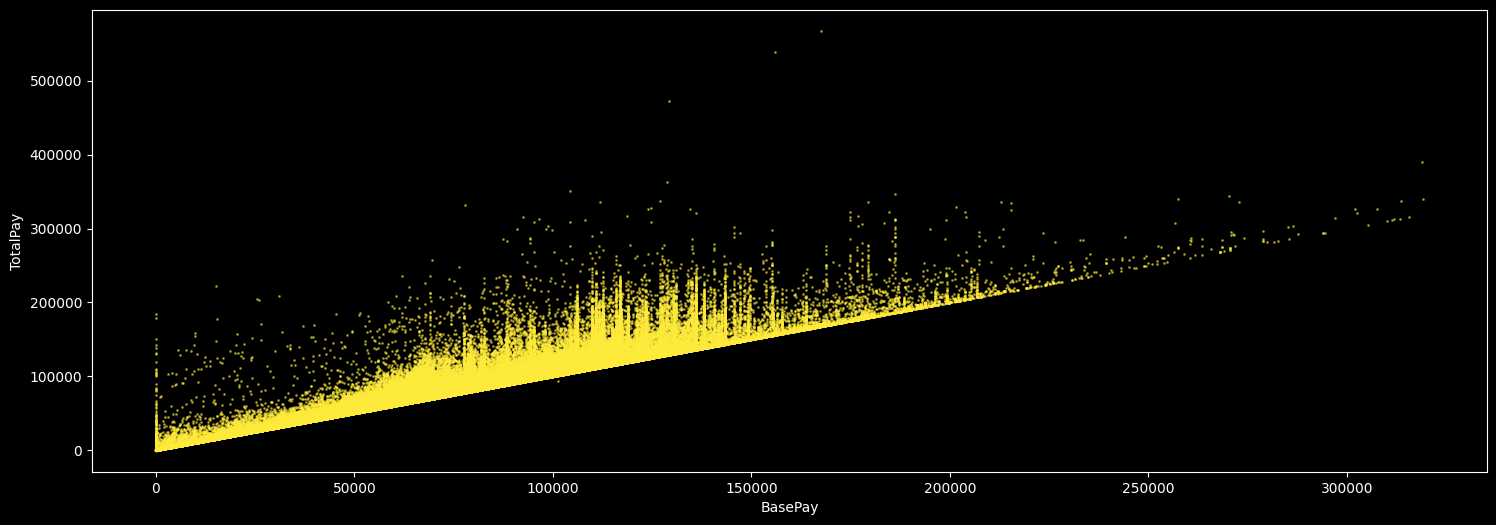

In [126]:
df.plot.scatter(
    x='BasePay',
    y='TotalPay',
    c='#ffeb3b',
    figsize=(18, 6),
    s=1,
    alpha=0.5,
)

### Task seven
# Summary of Insights

> we note that most employees do not belong to a specific department.

> the department which contains most employees is civil criminal department.

> we note that `TotalPay`(salary) consist of three columns:

- `BasePay`.
- `OvertimePay`.
- `OtherPay`.

    we found the relationship between `BasePay` and `TotalPay` in the previous task.

    so we will find relationships between each `OvertimePay` and `TotalPay` also `OtherPay` and `TotalPay`
    

In [127]:
df['TotalPay'].corr(df['OvertimePay'])

0.5048602762311212

<Axes: xlabel='OvertimePay', ylabel='TotalPay'>

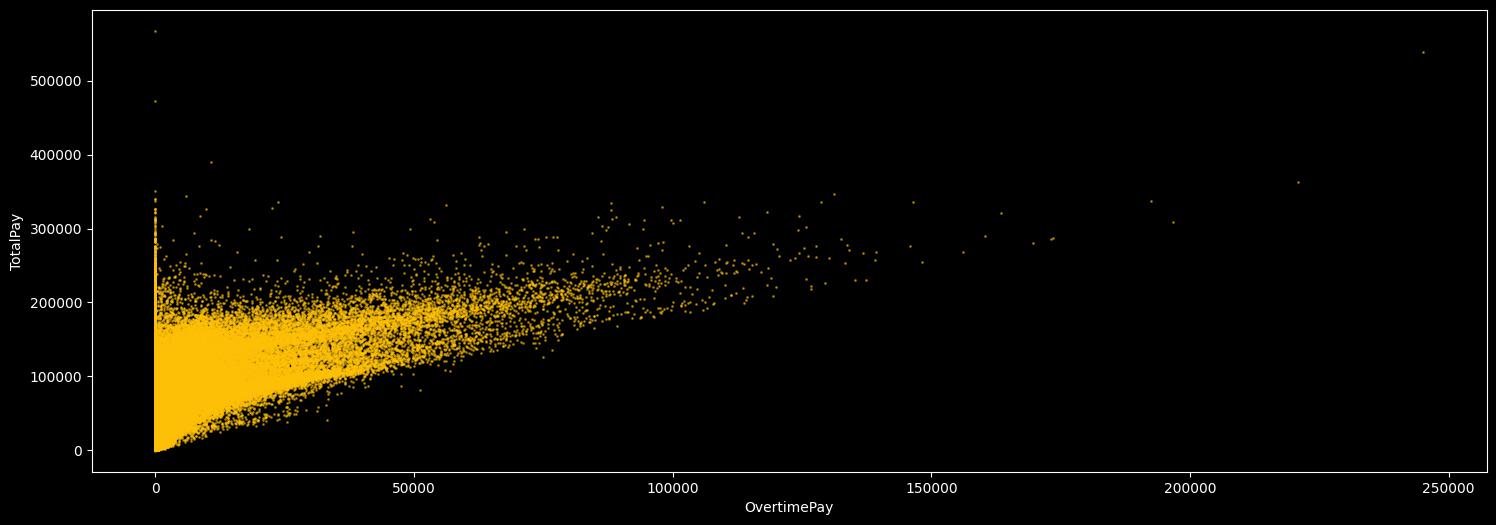

In [128]:
df.plot.scatter(
    x='OvertimePay',
    y='TotalPay',
    c='#ffc107',
    figsize=(18, 6),
    s=1,
    alpha=0.5,
)

In [129]:
df['TotalPay'].corr(df['OtherPay'])

0.4704987725357748

<Axes: xlabel='OtherPay', ylabel='TotalPay'>

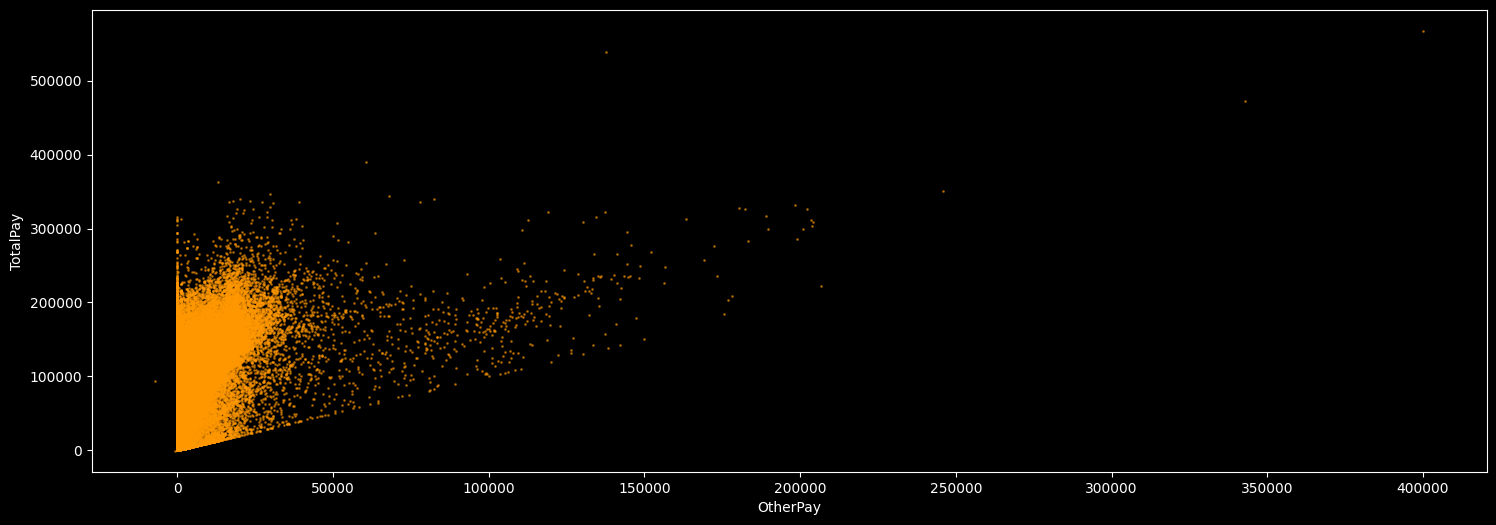

In [130]:
df.plot.scatter(
    x='OtherPay',
    y='TotalPay',
    c='#ff9800',
    figsize=(18, 6),
    s=1,
    alpha=0.5,
)